In [1]:
import pandas as pd
from confpred.cp import run_cp
import numpy as np

/Users/margaridacampos/.pyenv/versions/entmaxcp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
run_cp('CIFAR10','entmax', 0.1, '42', model_type='cnn')

Loading predictions.


(np.float64(1.0), np.float64(0.9903))

In [19]:
summary_results = pd.DataFrame(columns=['dataset','score','seed','alpha','avg_size','coverage'])
for dataset in ['MNIST','CIFAR10','CIFAR100']:
    for loss in ['sparsemax','softmax','entmax']:
        for seed in ['23','05','19','95','42']:
            for alpha in np.linspace(0.01,0.1,5):
                print(dataset+'_'+loss+'_'+seed+'_'+str(alpha))
                avg_set_size, coverage = run_cp(dataset,loss,alpha,seed)
                summary_results.loc[len(summary_results)] = dataset, loss, seed,alpha, avg_set_size, coverage

MNIST_sparsemax_23_0.01
Loading predictions.
MNIST_sparsemax_23_0.0325
Loading predictions.
MNIST_sparsemax_23_0.05500000000000001
Loading predictions.
MNIST_sparsemax_23_0.0775
Loading predictions.
MNIST_sparsemax_23_0.1
Loading predictions.
MNIST_sparsemax_05_0.01
Loading predictions.
MNIST_sparsemax_05_0.0325
Loading predictions.
MNIST_sparsemax_05_0.05500000000000001
Loading predictions.
MNIST_sparsemax_05_0.0775
Loading predictions.
MNIST_sparsemax_05_0.1
Loading predictions.
MNIST_sparsemax_19_0.01
Loading predictions.
MNIST_sparsemax_19_0.0325
Loading predictions.
MNIST_sparsemax_19_0.05500000000000001
Loading predictions.
MNIST_sparsemax_19_0.0775
Loading predictions.
MNIST_sparsemax_19_0.1
Loading predictions.
MNIST_sparsemax_95_0.01
Loading predictions.
MNIST_sparsemax_95_0.0325
Loading predictions.
MNIST_sparsemax_95_0.05500000000000001
Loading predictions.
MNIST_sparsemax_95_0.0775
Loading predictions.
MNIST_sparsemax_95_0.1
Loading predictions.
MNIST_sparsemax_42_0.01
Load

KeyboardInterrupt: 

In [5]:
summary_results['score'] = summary_results['score'].map(lambda s: s.replace('entmax','1.5-entmax'))

In [8]:
summary_results#.drop(columns=['seed']).groupby(['dataset','score','alpha']).mean()

,dataset,score,seed,alpha,avg_size,coverage
0,MNIST,sparsemax,23,0.0100,1.0190,0.9917
1,MNIST,sparsemax,23,0.0325,1.0000,0.9856
2,MNIST,sparsemax,23,0.0550,1.0000,0.9856
3,MNIST,sparsemax,23,0.0775,1.0000,0.9856
4,MNIST,sparsemax,23,0.1000,1.0000,0.9856
...,...,...,...,...,...,...
220,CIFAR100,1.5-entmax,42,0.0100,100.0000,1.0000
221,CIFAR100,1.5-entmax,42,0.0325,76.9500,0.9688
222,CIFAR100,1.5-entmax,42,0.0550,65.6876,0.9422
223,CIFAR100,1.5-entmax,42,0.0775,57.8599,0.9204


In [11]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_62751/2226018543.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')
/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_62751/2226018543.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


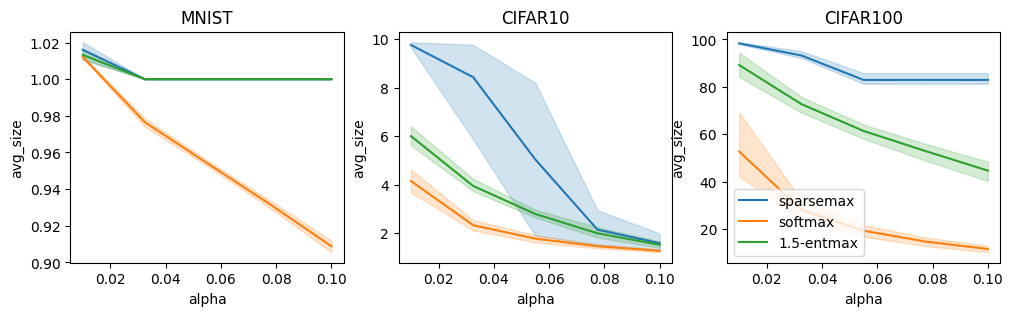

In [16]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index], legend = False)    
    axs[index].set_title(var)
    axs[index].set_ylim
    plt.legend(title='')

/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_62751/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')
/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_62751/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


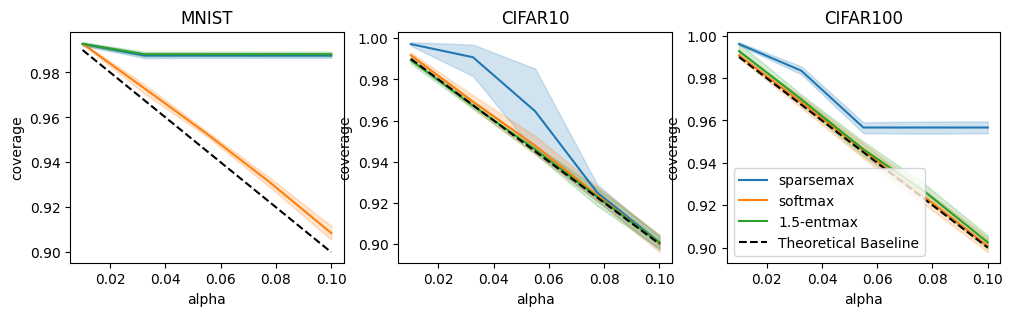

In [15]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index], legend = False)
    axs[index].set_title(var)
    axs[index].plot([0.01,0.1],[0.99,0.9], label = 'Theoretical Baseline', c='black', linestyle = 'dashed')
    plt.legend(title='')

In [12]:
from confpred.datasets import CIFAR10, CIFAR100, MNIST
import os
import pickle
from sklearn.metrics import accuracy_score

In [35]:
dataset_list = ['MNIST','CIFAR10','CIFAR100']
loss_list = ['softmax','sparsemax','entmax']
transformation = 'logits'
dataset = dataset_list[0]
loss = loss_list[0]
acc_df = pd.DataFrame({'dataset':dataset_list}).merge(pd.DataFrame({'loss':loss_list}), how = 'cross')
acc_df['cal_size'] = np.nan
acc_df['cal_acc'] = np.nan
acc_df['test_size'] = np.nan
acc_df['test_size'] = np.nan

for index, row in acc_df.iterrows():
    dataset = row['dataset']
    loss = row['loss'] 
    path = f'../entmax_cp/predictions/{dataset}_test_{loss}_{transformation}_proba.pickle'
    with open(path, 'rb') as f:
        test_proba = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_test_true.pickle'
    with open(path, 'rb') as f:
        test_true_enc = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_cal_{loss}_{transformation}_proba.pickle'
    with open(path, 'rb') as f:
        cal_proba = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_cal_true.pickle'
    with open(path, 'rb') as f:
        cal_true_enc = pickle.load(f)
    acc_df.at[index,'cal_acc'] = accuracy_score(cal_true_enc.argmax(axis = 1),cal_proba.argmax(axis = 1))
    acc_df.at[index,'test_acc'] = accuracy_score(test_true_enc.argmax(axis = 1),test_proba.argmax(axis = 1))
    acc_df.at[index,'cal_size'] = cal_true_enc.shape[0]
    acc_df.at[index,'test_size'] = test_true_enc.shape[0]

In [36]:
acc_df

,dataset,loss,cal_size,cal_acc,test_size,test_acc
0,MNIST,softmax,3000.0,0.987000,10000.0,0.9892
1,MNIST,sparsemax,3000.0,0.985333,10000.0,0.9874
2,MNIST,entmax,3000.0,0.985333,10000.0,0.9874
3,CIFAR10,softmax,3000.0,0.842667,10000.0,0.8366
4,CIFAR10,sparsemax,3000.0,0.837667,10000.0,0.8321
5,CIFAR10,entmax,3000.0,0.850000,10000.0,0.8503
6,CIFAR100,softmax,3000.0,0.576000,10000.0,0.5783
7,CIFAR100,sparsemax,3000.0,0.379667,10000.0,0.3878
8,CIFAR100,entmax,3000.0,0.557667,10000.0,0.5490


In [37]:
from confpred.datasets import CIFAR10, MNIST, CIFAR100
data = CIFAR10(0.2, 8, 3000, True)
len(data.train)

Files already downloaded and verified
Files already downloaded and verified


4700

In [38]:
data = CIFAR100(0.2, 8, 3000, True)
len(data.train)

Files already downloaded and verified
Files already downloaded and verified


4700

In [39]:
data = MNIST(0.2, 8, 3000, True)
len(data.train)

5700